In [1]:
import numpy as np
import pandas as pd

In [2]:
from QuantPortfolioOpt.quant_portfolio import main
from QuantPortfolioOpt.quant_portfolio.data import data_utils
from QuantPortfolioOpt.quant_portfolio.alphas import alpha_builder, alpha_functions

In [3]:
DB_PATH = r"C:\Users\marcu\AppData\Roaming\Python\Python311\site-packages\quantlib\database\cache\russell_3000\\"
DB_DATA = data_utils.load_cache(DB_PATH + r"russell_3000_cache.pickle")
RETURNS_DATA = pd.DataFrame(data_utils.load_cache(DB_PATH + r"adj_close_returns.pickle"))

Loading cache from C:\Users\marcu\AppData\Roaming\Python\Python311\site-packages\quantlib\database\cache\russell_3000\\russell_3000_cache.pickle
Loading cache from C:\Users\marcu\AppData\Roaming\Python\Python311\site-packages\quantlib\database\cache\russell_3000\\adj_close_returns.pickle


In [4]:
RETURNS_DATA

,AAPL,MSFT,AMZN,GOOGL,GOOG,NVDA,XOM,TSLA,UNH,JNJ
1980-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-03,NaN,NaN,NaN,NaN,NaN,NaN,-0.025523,NaN,NaN,0.001630
1980-01-04,NaN,NaN,NaN,NaN,NaN,NaN,0.009524,NaN,NaN,0.014634
1980-01-07,NaN,NaN,NaN,NaN,NaN,NaN,-0.004717,NaN,NaN,-0.001603
1980-01-08,NaN,NaN,NaN,NaN,NaN,NaN,0.007109,NaN,NaN,0.040128
...,...,...,...,...,...,...,...,...,...,...
2023-09-07,-0.029249,-0.008922,0.018395,0.005950,0.006131,-0.017424,-0.004890,-0.001707,0.016501,0.012784
2023-09-08,0.003492,0.013216,0.002757,0.008280,0.007342,-0.014468,0.014568,-0.011889,-0.004473,0.003312
2023-09-11,0.006623,0.010979,0.035231,0.003959,0.003936,-0.008646,-0.012542,0.100925,-0.002891,0.013079
2023-09-12,-0.017061,-0.018258,-0.013068,-0.011540,-0.012124,-0.006817,0.029170,-0.022297,0.001085,0.005656


In [5]:
DB_DATA['AAPL']

,open,high,low,close,adj_close,volume,log_open_returns,open_returns,log_high_returns,high_returns,log_low_returns,low_returns,log_close_returns,close_returns,log_adj_close_returns,adj_close_returns,actively_traded
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800,-0.049004,-0.047823,-0.053343,-0.051945,-0.053581,-0.052171,-0.053581,-0.052171,-0.053581,-0.052171,True
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000,-0.075869,-0.073063,-0.075869,-0.073063,-0.076231,-0.073398,-0.076231,-0.073398,-0.076231,-0.073397,True
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600,0.019512,0.019703,0.024331,0.024629,0.024450,0.024751,0.024450,0.024751,0.024450,0.024751,True
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600,0.028580,0.028992,0.028445,0.028853,0.028580,0.028992,0.028580,0.028992,0.028580,0.028992,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-07,175.179993,178.210007,173.539993,177.559998,177.559998,112488800,-0.072753,-0.070170,-0.057990,-0.056341,-0.044682,-0.043699,-0.029686,-0.029249,-0.029686,-0.029249,True
2023-09-08,178.350006,180.240005,177.789993,178.179993,178.179993,65551300,0.017934,0.018096,0.011327,0.011391,0.024195,0.024490,0.003486,0.003492,0.003486,0.003492,True
2023-09-11,180.070007,180.300003,177.339996,179.360001,179.360001,58953100,0.009598,0.009644,0.000333,0.000333,-0.002534,-0.002531,0.006601,0.006623,0.006601,0.006623,True
2023-09-12,179.490005,180.130005,174.820007,176.300003,176.300003,90370200,-0.003226,-0.003221,-0.000943,-0.000943,-0.014312,-0.014210,-0.017208,-0.017061,-0.017208,-0.017061,True


In [6]:
opt_args = {'gross_exposure': 1, 'net_exposure': 0, 'max_turnover': 0.25, 'verbose': False}
cov_args = {'apply_rolling_returns' : False, 'min_samples' : 2, 'lookback_vol' : 21, 'lookback_corr' : 21, 'strict_min_samples' : False}

In [29]:
portfolio = main.walk_forward_portfolio_optimization(db_data=DB_DATA, 
                                                     returns=RETURNS_DATA.tail(252*3),
                                                     opt_args=opt_args, 
                                                     cov_args=cov_args,
                                                     opt_method='max_expected_return',
                                                     cov_method='ewma_cov',
                                                     rebal_freq=5,
                                                     start_date="2022-01-01"
                                                     )

  0%|          | 0/2213 [00:00<?, ?it/s]

c:\Users\marcu\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\marcu\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
  0%|          | 0/2213 [00:00<?, ?it/s]c:\Users\marcu\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  return bound(*args, **kwds)
c:\Users\marcu\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instea

In [30]:
portfolio.w.sum(1).round(3).where(portfolio.w.sum(1).round(3) < 0).dropna()

Series([], dtype: float64)

In [46]:
port_rets = (RETURNS_DATA.tail(252*3) * portfolio.w.shift(1)).sum(axis=1)

<Axes: >

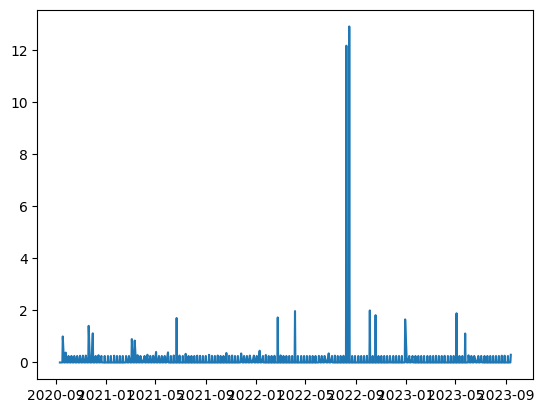

In [47]:
(portfolio.w - portfolio.w.shift(1)).abs().sum(1).plot()

<Axes: >

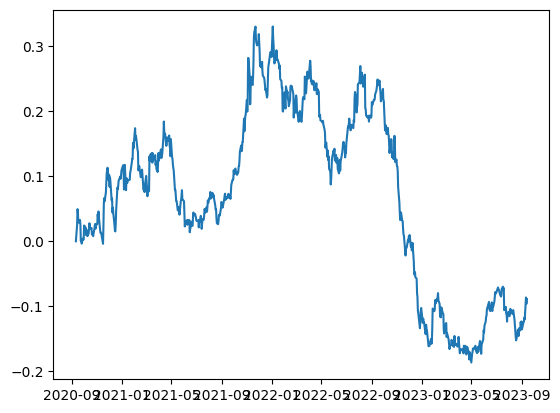

In [48]:
from quant_tools import performance_analysis as pa

pa.cumulative_returns(port_rets).plot()

In [27]:
pa.performance_summary(port_rets)

C:\Users\marcu\AppData\Roaming\Python\Python311\site-packages\quant_tools\performance_analysis.py:117: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha = regression.params[0]
C:\Users\marcu\AppData\Roaming\Python\Python311\site-packages\quant_tools\performance_analysis.py:118: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = regression.params[1]


,0 Performance Summary
Sharpe Ratio,0.627
Drift Adjusted Sharpe Ratio,0.108
CAGR,0.234
Vol,0.443
Sortino Ratio,1.963
Martin (Ulcer) Ratio,2.056
Omega Ratio,1.180
RR Ratio,1.246
Win Rate,0.505
Skew,30.103
